<a href="https://colab.research.google.com/github/kazuma313/everyday_coding/blob/main/StudyDeeper/ArtificialIntellegent/TensorFlow/NeuralNetwork/05_Transfer_learning_fine_tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning fine Tuned
Mari coba menggunakan metode fine tuned pada transfer learning

In [1]:
import datetime
print(datetime.datetime.now())

2023-10-06 14:49:12.986188


In [2]:
!nvidia-smi

Fri Oct  6 14:49:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-10-06 14:49:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2023-10-06 14:49:13 (11.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-10-06 14:49:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  27.5MB/s    in 7.2s    

2023-10-06 14:49:25 (22.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [6]:
train_dir= "10_food_classes_10_percent/train/"
test_dir= "10_food_classes_10_percent/test/"

In [7]:
import tensorflow as tf


In [8]:
image_size= (244, 244)

In [9]:
train_data_10_percent= tf.keras.preprocessing.image_dataset_from_directory(directory= train_dir,
                                                                           image_size= image_size,
                                                                           label_mode= "categorical",
                                                                           batch_size= 32)

test_data_10_percent= tf.keras.preprocessing.image_dataset_from_directory(directory= test_dir,
                                                                          image_size= image_size,
                                                                          label_mode= "categorical",
                                                                          batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
for image, label in train_data_10_percent.take(1): # ambil batch 1
  print(image, label)


tf.Tensor(
[[[[237.72763    204.72763    161.72763   ]
   [219.46472    186.46472    145.46472   ]
   [210.67294    175.67294    137.67294   ]
   ...
   [228.56581    113.687836   101.79488   ]
   [239.8067     143.17526    116.4164    ]
   [249.20659    170.4423     134.39148   ]]

  [[234.72003    201.72003    158.72003   ]
   [220.1519     185.1519     145.1519    ]
   [213.92563    175.92563    139.40863   ]
   ...
   [206.61974     88.1265      77.16015   ]
   [210.68596    103.68701     80.74338   ]
   [221.75705    124.25009     92.48467   ]]

  [[237.61537    202.61537    162.61537   ]
   [220.91106    182.91106    145.91106   ]
   [213.89558    172.22649    137.78287   ]
   ...
   [207.03165     83.237465    75.777626  ]
   [213.54721     94.86618     76.121635  ]
   [225.45813    108.74502     84.80201   ]]

  ...

  [[  5.434645     5.434645    65.43465   ]
   [  7.           7.          67.        ]
   [  5.254099     5.254099    65.2541    ]
   ...
   [253.49188    230.491

base model

In [12]:
from keras.src.layers.attention.multi_head_attention import activation
base_model= tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top= False)

base_model.trainable=False

input= tf.keras.layers.Input(shape= (244, 244, 3), name= "Input_layer")

x= base_model(input)
print(x.shape)

x= tf.keras.layers.GlobalAveragePooling2D(name= "global_average_pooling_layer")(x) # untuk mengecilkan dimensi
print(x.shape)

output= tf.keras.layers.Dense(10, activation= "softmax", name= "output_layer")(x)

model=  tf.keras.Model(input, output)


24274472/24274472 [==============================] - 2s 0us/step
(None, 8, 8, 1280)
(None, 1280)


In [13]:
model.compile(loss= "categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["accuracy"])

In [14]:
chackpoint_path= "checkpoint_weight/checkpoint.ckpt"

checkpoint_callback= tf.keras.callbacks.ModelCheckpoint(filepath=chackpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        save_freq="epoch",
                                                        verbose=1)



In [15]:
history= model.fit(
    train_data_10_percent,
    epochs= 10,
    steps_per_epoch= len(train_data_10_percent),
    validation_data= test_data_10_percent,
    validation_steps= int(0.2 * len(test_data_10_percent)),
    callbacks= [create_tensorboard_callback("transfer_learning", "10_percent_feature_extraction"),
                checkpoint_callback]
)

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231006-144939
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.9383 - accuracy: 0.4027
Epoch 1: val_loss improved from inf to 1.36988, saving model to checkpoint_weight/checkpoint.ckpt
24/24 [==============================] - 23s 279ms/step - loss: 1.9383 - accuracy: 0.4027 - val_loss: 1.3699 - val_accuracy: 0.7042
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.1873 - accuracy: 0.7554
Epoch 2: val_loss improved from 1.36988 to 0.90926, saving model to checkpoint_weight/checkpoint.ckpt
24/24 [==============================] - 5s 214ms/step - loss: 1.1830 - accuracy: 0.7560 - val_loss: 0.9093 - val_accuracy: 0.8000
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.8706 - accuracy: 0.8125
Epoch 3: val_loss improved from 0.90926 to 0.68390, saving model to checkpoint_weight/checkpoint.ckpt
24/24 [==============================] - 5s 196ms/step -

In [16]:
model.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 74ms/step - loss: 0.4472 - accuracy: 0.8772


[0.44724297523498535, 0.8772000074386597]

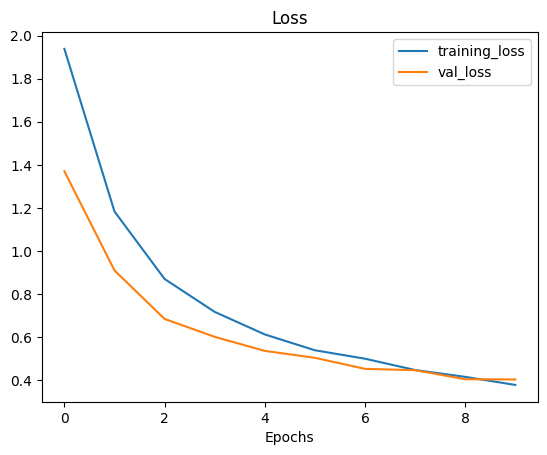

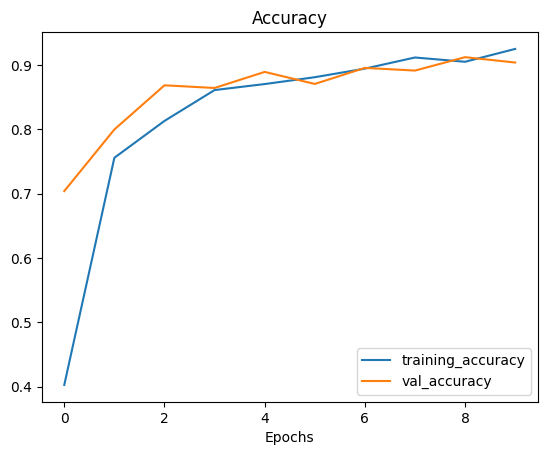

In [17]:
plot_loss_curves(history)

In [18]:
model.load_weights(chackpoint_path)
model.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 71ms/step - loss: 0.4472 - accuracy: 0.8772


[0.44724297523498535, 0.8772000074386597]

Code diatas menggunakan feature extraction dan menggunakan model checkpoint untuk menyimpan weight terbaik dari setiap pelatihan model. menggunakan checkpoint dapat load model sama dengan model yang sebelumnya tidak diload.

## Fine-Tunning
Menggunakan fine-tunning melakukan unfreezing layer diakhir. Dapat unfreeze 10 layer trakhir atau 5 trakhir. melakukan unfreeze ini tidak ada ukurannya. Yang terbaik akan didapatkan melalui experiment.
![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/05-fine-tuning-an-efficientnet-model.png)

In [19]:
model.layers

In [20]:
[[layer.name, layer.trainable] for layer in base_model.layers]

[['input_1', False],
 ['rescaling', False],
 ['normalization', False],
 ['stem_conv', False],
 ['stem_bn', False],
 ['stem_activation', False],
 ['block1a_project_conv', False],
 ['block1a_project_bn', False],
 ['block1a_project_activation', False],
 ['block2a_expand_conv', False],
 ['block2a_expand_bn', False],
 ['block2a_expand_activation', False],
 ['block2a_project_conv', False],
 ['block2a_project_bn', False],
 ['block2b_expand_conv', False],
 ['block2b_expand_bn', False],
 ['block2b_expand_activation', False],
 ['block2b_project_conv', False],
 ['block2b_project_bn', False],
 ['block2b_drop', False],
 ['block2b_add', False],
 ['block3a_expand_conv', False],
 ['block3a_expand_bn', False],
 ['block3a_expand_activation', False],
 ['block3a_project_conv', False],
 ['block3a_project_bn', False],
 ['block3b_expand_conv', False],
 ['block3b_expand_bn', False],
 ['block3b_expand_activation', False],
 ['block3b_project_conv', False],
 ['block3b_project_bn', False],
 ['block3b_drop', False

semua layer dari model efficientnet trainablenya false, ini menandakan weight pada setiap model freeze. Maru unfreeze 10 layer dari atas.

In [21]:
base_model.layers[-10:]

In [22]:
for layer in base_model.layers[-10:]:
  layer.trainable = True

In [23]:
for layer in base_model.layers:
  print(layer.name, layer.trainable)

input_1 False
rescaling False
normalization False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv False
block3a_expand_bn False
block3a_expand_activation False
block3a_project_conv False
block3a_project_bn False
block3b_expand_conv False
block3b_expand_bn False
block3b_expand_activation False
block3b_project_conv False
block3b_project_bn False
block3b_drop False
block3b_add False
block4a_expand_conv False
block4a_expand_bn False
block4a_expand_activation False
block4a_dwconv2 False
block4a_bn False
block4a_activation False
block4a_se_squeeze False
block4a_se_reshape False
block4a

In [29]:
model.compile(loss= "categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(0.0001), # perkecil learning rate karena akan mengupdate weight yang telah ada
              metrics= ["accuracy"])

In [30]:
history.epoch[-1]

9

In [31]:
history2= model.fit(train_data_10_percent,
                    epochs= 20,
                    steps_per_epoch= len(train_data_10_percent),
                    validation_data= test_data_10_percent,
                    validation_steps= int(0.5 * len(test_data_10_percent)),
                    initial_epoch= history.epoch[-1],
                    callbacks= [create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20231006-145333
Epoch 10/20
24/24 [==============================] - 17s 356ms/step - loss: 0.4950 - accuracy: 0.9147 - val_loss: 0.5167 - val_accuracy: 0.8726
Epoch 11/20
24/24 [==============================] - 7s 288ms/step - loss: 0.4849 - accuracy: 0.9053 - val_loss: 0.5290 - val_accuracy: 0.8726
Epoch 12/20
24/24 [==============================] - 5s 215ms/step - loss: 0.4750 - accuracy: 0.9213 - val_loss: 0.5132 - val_accuracy: 0.8782
Epoch 13/20
24/24 [==============================] - 5s 191ms/step - loss: 0.4540 - accuracy: 0.9253 - val_loss: 0.4926 - val_accuracy: 0.8838
Epoch 14/20
24/24 [==============================] - 6s 250ms/step - loss: 0.4559 - accuracy: 0.9213 - val_loss: 0.5022 - val_accuracy: 0.8846
Epoch 15/20
24/24 [==============================] - 7s 287ms/step - loss: 0.4365 - accuracy: 0.9227 - val_loss: 0.4897 - val_accuracy: 0.8854
Epoch 16/20
24/24 [==========================

In [34]:
import matplotlib.pyplot as plt

In [35]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

10
21
[0.4026666581630707, 0.7559999823570251, 0.8133333325386047, 0.8613333106040955, 0.8706666827201843, 0.8813333511352539, 0.8946666717529297, 0.9120000004768372, 0.9053333401679993, 0.9253333210945129, 0.9146666526794434, 0.9053333401679993, 0.9213333129882812, 0.9253333210945129, 0.9213333129882812, 0.9226666688919067, 0.9226666688919067, 0.9306666851043701, 0.9306666851043701, 0.9319999814033508, 0.9346666932106018]


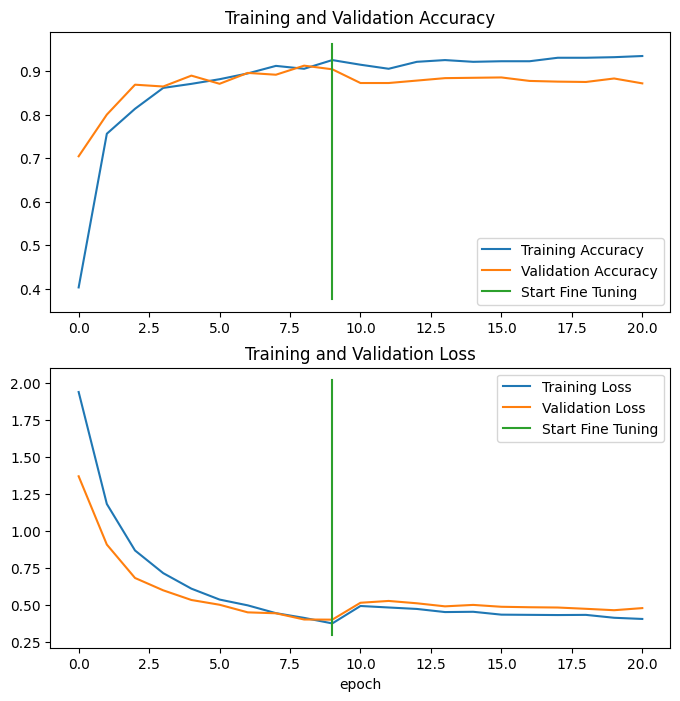

In [36]:
compare_historys(original_history=history,
                 new_history=history2,
                 initial_epochs=10)

terjadinya overfitting. perlu dilakukan experiment lebih lanjut untuk mendapatkan hasil yang maksimal.

In [ ]:
StudyDeeper/ArtificialIntellegent/TensorFlow/NeuralNetwork/